In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import scipy

%matplotlib inline

# Make better use of Jupyter Notebook cell width

from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))
pd.options.display.float_format = '{:.2f}'.format

2023-02-25 11:57:59.461139: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# We can install tensorflow either with:

- conda install tensorflow -y
- pip install tensorflow

In [2]:
tf.__version__

'2.9.1'

In [3]:
# Loading images:

In [4]:
from tensorflow.keras.preprocessing.image import load_img

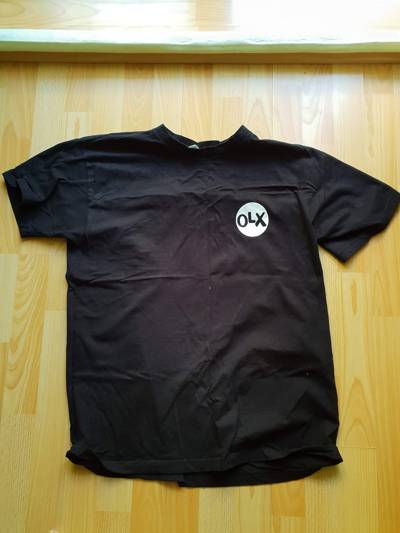

In [5]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
full_name = f'{path}/{name}'
load_img(full_name)

In [6]:
img = load_img(full_name, target_size=(299, 299))

In [7]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7FBA3C4A65B0>


In [8]:
# PIL is library for processing images.

In [9]:
x = np.array(img)
x.shape

(299, 299, 3)

# Pre-trained convolutional Networks

- Pre-trained models: https://keras.io/api/applications/

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-02-25 11:58:16.174164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 11:58:16.181320: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 11:58:16.182004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 11:58:16.183135: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [12]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
X[0]

# after preprocess it is converted from (0,255) to (-1,1)

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804]],

       [[ 0.47450984,  0.4039216 , -0.1372549 ],
        [ 0.4666667 ,  0.39607847, -0.14509803],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [15]:
pred = model.predict(X)

pred.shape

2023-02-25 11:58:23.490440: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-02-25 11:58:24.115635: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-25 11:58:24.116723: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-25 11:58:24.116764: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-02-25 11:58:24.117694: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-25 11:58:24.117780: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


(1, 1000)

In [16]:
# Let's make the predictions human readable by using decode_predictions:

decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

#  Concolutional neural networks:

# Basic Structure:
- Image > Conv. Layer > Vector Representation > Dense Layers > Pred output

# Transfer Learning

- Reading data with ImageDataGenerator
- Train Xception on smaller images(150x150)

(Better to run it with a GPU)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# reading from directory:

- Batch_size is how many image we want to train.

In [19]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size= 32
)

Found 3068 images belonging to 10 classes.


In [23]:
#!ls -l clothing-dataset-small/train

In [20]:
# Using for loop with next function:

X, y = next(train_ds)

In [21]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size= 32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [23]:
base_model = Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(150, 150, 3)
)

# Freeze the convolutional base by preventing the weights being updated during training
base_model.trainable = False

# Trainable = False means we don't wanna change conveluational layers!
# Include_Top=False parameter does not include dense layers! 

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer

vectors = keras.layers.GlobalAveragePooling2D()(base) #pooling operation: Convert matrices into vectors using pooling layer

outputs = keras.layers.Dense(10)(vectors) # Create dense layer of 10 classes

model = keras.Model(inputs, outputs)

In [24]:
# Pooling reduce the dimension which can help to reduce computational cost of subsequent layers!

In [25]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [29]:
# Before the pooling:


- batch size = 32
- channels(number of feature maps) = 2048

In [31]:
# After adding dense layer:

preds.shape

(32, 10)

In [32]:
# Optimizer for weights: (Optimizers use gradient descent logic):
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Loss: It tells us how good model is!

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

# logit: row output of dense layer

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [33]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 18s 164ms/step - loss: 1.3180 - accuracy: 0.6594 - val_loss: 0.9229 - val_accuracy: 0.7566
Epoch 2/10
96/96 [==============================] - 12s 122ms/step - loss: 0.5513 - accuracy: 0.8279 - val_loss: 0.9586 - val_accuracy: 0.7595
Epoch 3/10
96/96 [==============================] - 12s 123ms/step - loss: 0.3178 - accuracy: 0.8902 - val_loss: 0.7661 - val_accuracy: 0.7918
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.2128 - accuracy: 0.9231 - val_loss: 0.7401 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.1850 - accuracy: 0.9361 - val_loss: 0.9568 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.1340 - accuracy: 0.9563 - val_loss: 0.8297 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 12s 122ms/step - loss: 0.0908 - accuracy: 0.9716 - val_loss: 0.8427 - val_accuracy: 0.8123

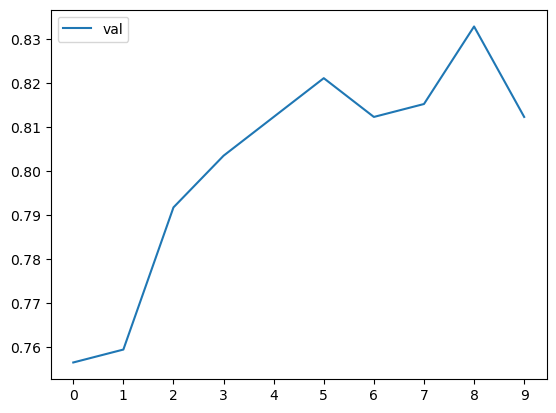

In [34]:
import matplotlib.pyplot as plt 

#plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.xticks(np.arange(10))

plt.legend()

In [35]:
# Adjusting the learning rate
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    
    base_model.trainable = False
    
    ###################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer
    vectors = keras.layers.GlobalAveragePooling2D()(base) #pooling operation: Convert matrices into vectors using pooling layer
    outputs = keras.layers.Dense(10)(vectors) # Create dense layer of 10 classes
    model = keras.Model(inputs, outputs)
    
    ###################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)


    loss = keras.losses.CategoricalCrossentropy(from_logits=True)


    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    return model

In [36]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 133ms/step - loss: 1.9018 - accuracy: 0.3667 - val_loss: 1.5940 - val_accuracy: 0.4956
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 1.3767 - accuracy: 0.5619 - val_loss: 1.2602 - val_accuracy: 0.5982
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 1.1353 - accuracy: 0.6389 - val_loss: 1.0740 - val_accuracy: 0.6598
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.9967 - accuracy: 0.6864 - val_loss: 0.9573 - val_accuracy: 0.6979
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.9035 - accuracy: 0.7138 - val_loss: 0.8866 - val_accuracy: 0.7185
Epoch 6/10
96/96 [==============================] - 12s 123ms/step - loss: 0.8348 - accuracy: 0.7347 - val_loss: 0.8344 - val_accuracy: 0.7331
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.7834 - accuracy: 0.7503 - val_loss: 0.7880 - val_accuracy:

In [37]:
del scores[0.1]
del scores[0.0001]

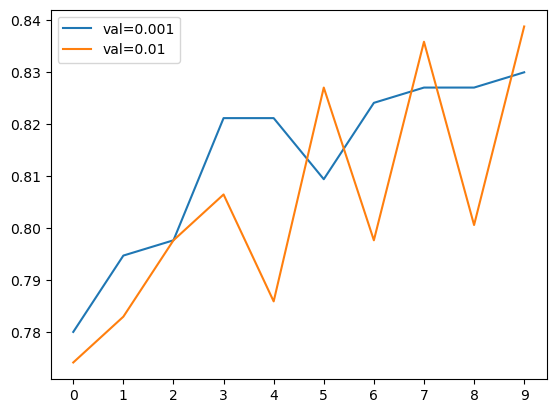

In [38]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [39]:
learning_rate = 0.001

# Checkpointing

- Saving the best model only
- Training a model with callbacks

In [40]:
model

In [41]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
    
)

In [42]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 15s 134ms/step - loss: 1.1503 - accuracy: 0.6125 - val_loss: 0.7615 - val_accuracy: 0.7537
Epoch 2/10
96/96 [==============================] - 12s 127ms/step - loss: 0.6490 - accuracy: 0.7819 - val_loss: 0.6632 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 12s 128ms/step - loss: 0.5229 - accuracy: 0.8243 - val_loss: 0.6059 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 12s 127ms/step - loss: 0.4392 - accuracy: 0.8592 - val_loss: 0.5750 - val_accuracy: 0.8211
Epoch 5/10
96/96 [==============================] - 12s 125ms/step - loss: 0.3782 - accuracy: 0.8859 - val_loss: 0.5708 - val_accuracy: 0.8270
Epoch 6/10
96/96 [==============================] - 12s 125ms/step - loss: 0.3369 - accuracy: 0.9029 - val_loss: 0.5512 - val_accuracy: 0.8299
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.2961 - accuracy: 0.9123 - val_loss: 0.5548 - val_accuracy: 0.8240

# Adding more layers:

- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [43]:
##

def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    
    base_model.trainable = False
    
    ###################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer
    vectors = keras.layers.GlobalAveragePooling2D()(base) #pooling operation: Convert matrices into vectors using pooling layer
    
    #adding inner layer:
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner) # Create dense layer of 10 classes
    model = keras.Model(inputs, outputs)
    
    ###################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)


    loss = keras.losses.CategoricalCrossentropy(from_logits=True)


    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    return model

In [44]:
# Tuning inner_size parameter first:

learning_rate = 0.001

scores = {}


for size in [10, 100, 1000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate,size_inner=size )
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 15s 132ms/step - loss: 1.8994 - accuracy: 0.3745 - val_loss: 1.5008 - val_accuracy: 0.5484
Epoch 2/10
96/96 [==============================] - 12s 124ms/step - loss: 1.2891 - accuracy: 0.5414 - val_loss: 0.9678 - val_accuracy: 0.7331
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 0.8287 - accuracy: 0.7291 - val_loss: 0.7390 - val_accuracy: 0.7654
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.6355 - accuracy: 0.7901 - val_loss: 0.6811 - val_accuracy: 0.7654
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.5377 - accuracy: 0.8266 - val_loss: 0.6629 - val_accuracy: 0.7654
Epoch 6/10
96/96 [==============================] - 12s 124ms/step - loss: 0.4644 - accuracy: 0.8523 - val_loss: 0.6385 - val_accuracy: 0.7801
Epoch 7/10
96/96 [==============================] - 12s 122ms/step - loss: 0.4110 - accuracy: 0.8745 - val_loss: 0.6491 - val_accuracy: 0.7

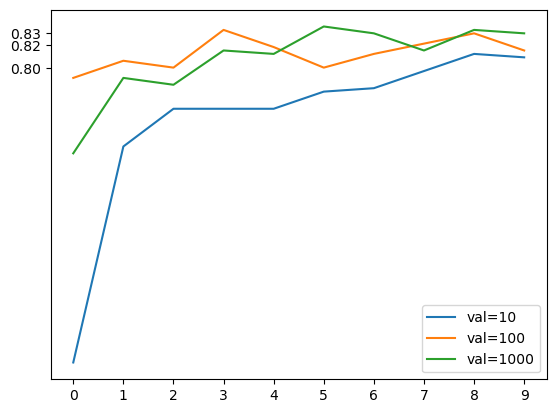

In [45]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
    
plt.xticks(np.arange(10))
plt.yticks([0.80, 0.82, 0.83])
plt.legend()

# Regularization and dropout:

- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [46]:
##

def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    
    base_model.trainable = False
    
    ###################################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer
    vectors = keras.layers.GlobalAveragePooling2D()(base) #pooling operation: Convert matrices into vectors using pooling layer
    
    #adding inner layer:
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    # applying dropout to inner layer :
    
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop) # Create dense layer of 10 classes
    model = keras.Model(inputs, outputs)
    
    ###################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)


    loss = keras.losses.CategoricalCrossentropy(from_logits=True)


    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    return model

In [47]:
# Tuning dropput rate 

learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    
    model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                      droprate=droprate
    )
    # Increasing epoch 10 to 30 since we use dropout:
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 15s 132ms/step - loss: 0.9681 - accuracy: 0.6705 - val_loss: 0.6013 - val_accuracy: 0.7977
Epoch 2/30
96/96 [==============================] - 12s 122ms/step - loss: 0.4975 - accuracy: 0.8286 - val_loss: 0.5704 - val_accuracy: 0.8123
Epoch 3/30
96/96 [==============================] - 12s 123ms/step - loss: 0.3658 - accuracy: 0.8784 - val_loss: 0.5358 - val_accuracy: 0.8123
Epoch 4/30
96/96 [==============================] - 12s 123ms/step - loss: 0.2593 - accuracy: 0.9198 - val_loss: 0.5349 - val_accuracy: 0.8211
Epoch 5/30
96/96 [==============================] - 13s 139ms/step - loss: 0.1822 - accuracy: 0.9485 - val_loss: 0.6215 - val_accuracy: 0.7801
Epoch 6/30
96/96 [==============================] - 12s 123ms/step - loss: 0.1345 - accuracy: 0.9654 - val_loss: 0.5649 - val_accuracy: 0.8094
Epoch 7/30
96/96 [==============================] - 12s 124ms/step - loss: 0.0887 - accuracy: 0.9840 - val_loss: 0.5812 - val_accuracy: 0.

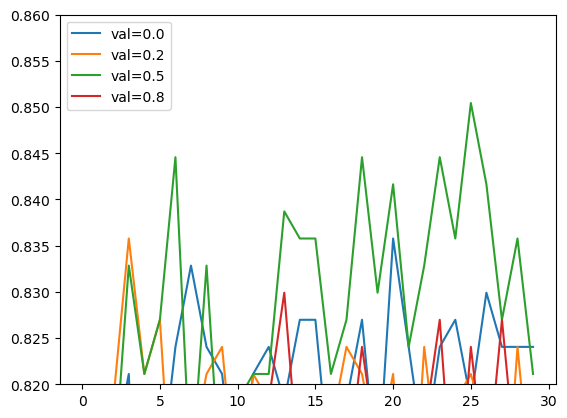

In [53]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
    
plt.ylim(0.82, 0.86)
plt.legend()

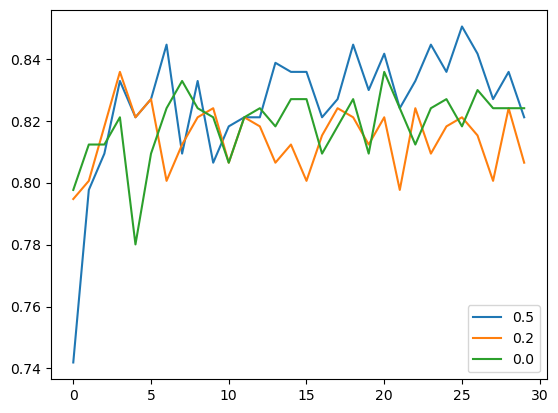

In [61]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)


hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

plt.legend()

- Let's go with rate of 0.5 for dropout!

# Data Augmentation

In [ ]:
Data aug

-- Choosing augmentations:

- Look at the data dataset, what kind of variations are there ?
- Are the objects always centered ? (Rotate,shift)
- Tune it as a hyperparameter 

In [69]:
# Create image generator for train data and also augment the images:

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #rotation_range=30, # range between (-30, 30)
    #width_shift_range=10.0, # range between (-10, 10)
    #eight_shift_range=10.0,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)


val_ds = val_gen.flow_from_directory(
'./clothing-dataset-small/validation/',
target_size=(150, 150),
batch_size=32,
shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [70]:
# augmentation + dropout:

learning_rate = 0.001
size = 100
droprate = 0.5

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate

)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 27s 254ms/step - loss: 1.5070 - accuracy: 0.5134 - val_loss: 0.8496 - val_accuracy: 0.7478
Epoch 2/50
96/96 [==============================] - 24s 247ms/step - loss: 1.1141 - accuracy: 0.6281 - val_loss: 0.7548 - val_accuracy: 0.7713
Epoch 3/50
96/96 [==============================] - 24s 246ms/step - loss: 0.9929 - accuracy: 0.6711 - val_loss: 0.6771 - val_accuracy: 0.7771
Epoch 4/50
96/96 [==============================] - 24s 245ms/step - loss: 0.9164 - accuracy: 0.6959 - val_loss: 0.6471 - val_accuracy: 0.7977
Epoch 5/50
96/96 [==============================] - 24s 245ms/step - loss: 0.8581 - accuracy: 0.7115 - val_loss: 0.6452 - val_accuracy: 0.7977
Epoch 6/50
96/96 [==============================] - 24s 247ms/step - loss: 0.8077 - accuracy: 0.7141 - val_loss: 0.6383 - val_accuracy: 0.7771
Epoch 7/50
96/96 [==============================] - 24s 248ms/step - loss: 0.7299 - accuracy: 0.7497 - val_loss: 0.6173 - val_accuracy: 0.7801

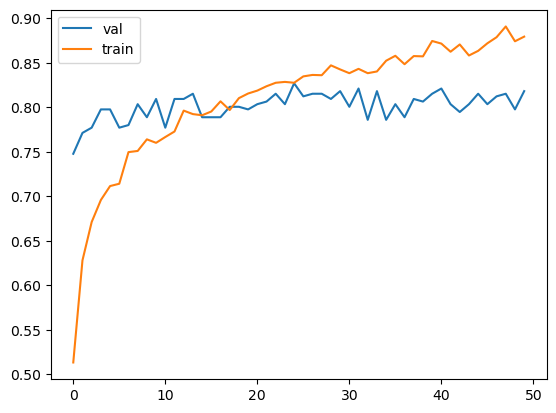

In [71]:
hist = history.history

plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

# Training a larger model

- Train a 299x299 model

In [73]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [74]:
input_size = 299

In [75]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [76]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [78]:
learning_rate = 0.001
size = 100
droprate = 0.5

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 70s 705ms/step - loss: 0.9745 - accuracy: 0.6858 - val_loss: 0.5363 - val_accuracy: 0.8387
Epoch 2/50
96/96 [==============================] - 65s 680ms/step - loss: 0.5809 - accuracy: 0.8005 - val_loss: 0.4390 - val_accuracy: 0.8651
Epoch 3/50
96/96 [==============================] - 66s 686ms/step - loss: 0.4960 - accuracy: 0.8263 - val_loss: 0.4222 - val_accuracy: 0.8534
Epoch 4/50
96/96 [==============================] - 66s 687ms/step - loss: 0.4501 - accuracy: 0.8484 - val_loss: 0.3853 - val_accuracy: 0.8739
Epoch 5/50
96/96 [==============================] - 65s 680ms/step - loss: 0.3887 - accuracy: 0.8621 - val_loss: 0.4022 - val_accuracy: 0.8446
Epoch 6/50
96/96 [==============================] - 65s 675ms/step - loss: 0.3771 - accuracy: 0.8709 - val_loss: 0.3776 - val_accuracy: 0.8798
Epoch 7/50
96/96 [==============================] - 66s 685ms/step - loss: 0.3499 - accuracy: 0.8784 - val_loss: 0.3818 - val_accuracy: 0.8739

KeyboardInterrupt: 

# Using the model:

- Loading the model
- Evaluating the model
- Getting predictions

In [79]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [80]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [81]:
model = keras.models.load_model('xception_v4_1_28_0.891.h5')

In [82]:
model.evaluate(test_ds)

12/12 [==============================] - 4s 278ms/step - loss: 0.2403 - accuracy: 0.9113


[0.24031196534633636, 0.9112903475761414]

In [83]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [84]:
img = load_img(path, target_size=(299, 299))

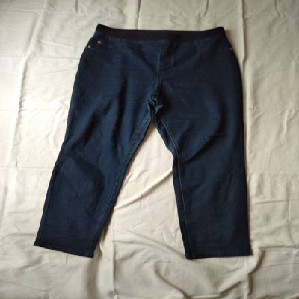

In [91]:
img

In [85]:
import numpy as np

x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [86]:
X = preprocess_input(X)

In [88]:
pred = model.predict(X)

1/1 [==============================] - 1s 647ms/step


In [89]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [90]:
dict(zip(classes, pred[0]))

{'dress': -3.6447647,
 'hat': -6.7723613,
 'longsleeve': -3.165047,
 'outwear': -2.5976748,
 'pants': 10.014816,
 'shirt': -2.9676354,
 'shoes': -7.683845,
 'shorts': 4.108992,
 'skirt': -5.237943,
 't-shirt': -5.413229}

# Classes, function, and attributes:

- from tensorflow.keras.preprocessing.image import ImageDataGenerator: to read the image data and make it useful for training/validation
- flow_from_directory(): method to read the images directly from the directory
- next(train_ds): to unpack features and target variables
- train_ds.class_indices: attribute to get classes according to the directory structure
- GlobalAveragePooling2D(): accepts 4D tensor as input and operates the mean on the height and width dimensionalities for all the channels and returns vector representation of all images
- CategoricalCrossentropy(): method to produces a one-hot array containing the probable match for each category in multi classification
- model.fit(): method to train model
- epochs: number of iterations over all of the training data
- history.history: history attribute is a dictionary recording loss and metrics values (accuracy in our case) for at each epoch


In [ ]:
# 